<a href="https://colab.research.google.com/github/ParbatiDebbarma/Aerofit/blob/main/Aerofit_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Aerofit**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/aerofit_treadmill.csv')

In [ ]:
df.head() # Checking the first 5 rows of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Business Problem**

---


To investigate whether there are differences across the product with respect to customer characteristics.

- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


**Dataset contains following columns**
- Product Purchased: KP281, KP481 and KP781, are the 3 different types of treadmills
that are purchased by customers
- Age : In years, age of the customer who purchased
- Gender: Gender of the purchased customer
- Education: represented in years
- Marital Status: Single or partnered
- Usage: The average number of times the customer has planned to use the treadmill each
week
- Fitness: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)
- Miles: The average number of miles the customer expects to walk or run each week
- Income: Annual income of the user in Dollars

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
print(f'Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}') # Checking for the shape of the dataset


Number of rows: 180
Number of columns: 9


- The summary statistics indicate that each column has 180 entries, matching the total number of entries in the dataset. This consistency suggests that there are no missing (null) values

In [ ]:
# Generate descriptive statistics that summarize the central tendency,dispersion, and shape of the dataset's numerical distributions
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Age** :
The average age of the participants is 28.79 years, ranging from 18 to 50 years. The middle 50% of the participants are aged between 24 and 33 years, indicating a relatively young cohort.

**Education** :
Participants have an average of 15.57 years of education, with a range from 12 to 21 years. The median education level is 16 years.

**Usage** :
On average, participants use the product 3.46 times per period, with usage frequencies ranging from 2 to 7 times. The interquartile range of 3 to 4 times and a standard deviation of 1.08 suggest that usage patterns are fairly consistent among participants. The median usage frequency is 3 times per period.

**Fitness** :
The average fitness score among participants is 3.31 on a likely scale, with scores ranging from 1 to 5. The median fitness score is 3, suggesting an overall moderate fitness level.

**Income** :
Participants have an average income of 53,719.58 USD, with a wide range from 29,562 USD to 104,581 USD.The median income is 50,596.50 USD, showing some skewness in the distribution.

**Miles** :
On average, participants report traveling 103.19 miles, with a range from 21 to 360 miles.





In [ ]:
# Check for unique values in columns
for i in df.columns:
    print(f'Unique columns in {i}:')
    print(df[i].unique())
    print('-'*50)

Unique columns in Product:
['KP281' 'KP481' 'KP781']
--------------------------------------------------
Unique columns in Age:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
--------------------------------------------------
Unique columns in Gender:
['Male' 'Female']
--------------------------------------------------
Unique columns in Education:
[14 15 12 13 16 18 20 21]
--------------------------------------------------
Unique columns in MaritalStatus:
['Single' 'Partnered']
--------------------------------------------------
Unique columns in Usage:
[3 2 4 5 6 7]
--------------------------------------------------
Unique columns in Fitness:
[4 3 2 1 5]
--------------------------------------------------
Unique columns in Income:
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57

There are 3 Unique products



---



**Transforming numerical data intyo insightful categories**

---





In [ ]:
#Categorizes the values in a DataFrame column into defined bins with labels or applies a direct mapping.
def categorize(df, column, bins= None, labels= None, new_column_name = None, mapping = None): #None, modifies the DataFrame in place by adding a new categorical column if provided or modifies existing column.
    if mapping is not None:
        df[new_column_name] = df[column].map(mapping)
    else:
        df[new_column_name] = pd.cut(df[column], bins=bins, labels=labels, right=False)


# Fitness mapping with a new column name
fitness_mapping = {
1: "Needs Improvement",
2: "Below Average",
3: "Average",
4: "Good",
5: "Excellent"
}
categorize(df, 'Fitness', mapping=fitness_mapping, new_column_name='Fitness_Category')
# Data binning for 'Age'
age_bins = [18, 26, 36, 46, float('inf')]
age_labels = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']
categorize(df, 'Age', age_bins, age_labels, 'Age_Category')
# Data binning for 'Education'
education_bins = [0, 13, 16, float('inf')]
education_labels = ['Primary Education', 'Secondary Education', 'Higher Education']
categorize(df, 'Education', education_bins, education_labels, 'Ed_Category')
# Data binning for 'Income'
income_bins = [0, 40001, 60001, 80001, float('inf')]
income_labels = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']
categorize(df, 'Income', income_bins, income_labels, 'Income_Category')
# Data binning for 'Miles'
miles_bins = [0, 51, 101, 201, float('inf')]
miles_labels = ['Light Activity', 'Moderate Activity', 'Active Lifestyle','Very Active']
categorize(df, 'Miles', miles_bins, miles_labels, 'Miles_Category')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Category,Age_Category,Ed_Category,Income_Category,Miles_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Young Adult,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Young Adult,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Young Adult,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Young Adult,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below Average,Young Adult,Secondary Education,Low Income,Light Activity


**Statistical Summary**

---



In [ ]:
# Calculate the percentage of each unique product, rounded to two decimal places
stat = df['Product'].value_counts(normalize=True).mul(100).round(2)
# Display the result
print(stat)

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64


- **Product Preference:** The distribution indicates that KP281 is
the most preferred treadmill, accounting for 44.44% of the purchases. This suggests that customers might be favoring more cost-effective or possibly entry-level models, as KP281 is described as an entry-level treadmill.
- **Market Segmentation:** KP481 and KP781 have 33.33% and 22.22% of sales, respectively. This could imply that while there is a significant market for mid-level and advanced treadmills,
the entry-level models still dominate.

In [ ]:
# Calculate the percentage of each gender, rounded to two decimal places
gender_res = df['Gender'].value_counts(normalize=True).mul(100).round(2)
# Display the result
print(gender_res)

Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64


The output shows that males represent 57.78% of the customers,
while females account for 42.22%

In [ ]:
# Calculate the percentage of each marital status, rounded to two decimal places
marital_status_res = df['MaritalStatus'].value_counts(normalize=True).mul(100).round(2)
# Display the result
print(marital_status_res)

MaritalStatus
Partnered    59.44
Single       40.56
Name: proportion, dtype: float64


- The output indicates that 59.44% of the customers are partnered, while 40.56% are single. This shows a majority of customers
have a partner
-  Target Audience Insight: The higher proportion of partnered individuals could
suggest that these customers might be purchasing treadmills for shared use at home, or they may have a higher disposable income, influencing their purchasing decisions

In [ ]:
 # Calculate the percentage distribution of usage days per week, rounded to two decimal places
usage_per_week_and_respective_percentage = df['Usage'].value_counts(normalize=True).mul(100).round(2).reset_index()
# Display the result
print(usage_per_week_and_respective_percentage)


   Usage  proportion
0      3       38.33
1      4       28.89
2      2       18.33
3      5        9.44
4      6        3.89
5      7        1.11


**Interpretations Based on the Output:**

- Moderate Frequency is Most Popular:The most common usage frequency is 3 days per week, which suggests that most customers prefer a balanced
approach to their fitness regimen.
- Lower Frequency Still Significant: The usage for 4 days per week and 2 days per week is not far behind, indicating a significant segment of the market with
less intense workout schedules.
- High Frequency Less Common: Higher frequencies (5 days a
week and above) are progressively less common, reflecting a smaller group of users who are perhaps more fitness-oriented or have specific training goals

In [ ]:
#Calculate the percentage distribution of self-rated fitness levels, rounded to two decimal places
fitness_rating_and_respective_percentage = df['Fitness'].value_counts(normalize=True).mul(100).round(2).reset_index()
# Display the result
print(fitness_rating_and_respective_percentage)

   Fitness  proportion
0        3       53.89
1        5       17.22
2        2       14.44
3        4       13.33
4        1        1.11


- Diverse Fitness Perceptions: This analysis will reveal a
spectrum of self-perceived fitness levels across the customer base.
- Marketing Strategy: Aerofit can
tailor marketing messages based on the prevalent fitness categories.



---



 **Visual Analysis - Univariate
  & Bivariate**





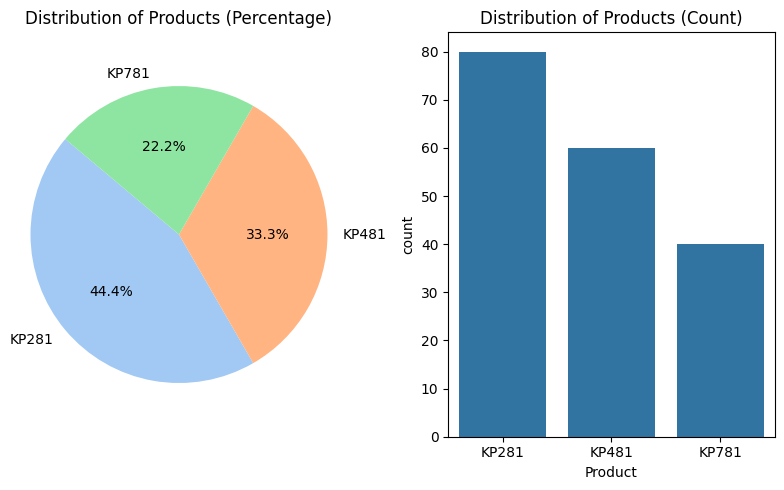

In [ ]:
#Create subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
9
# Pie chart for Product distribution
product_counts = df['Product'].value_counts()
colors = sns.color_palette("pastel")
# Get the pastel color palette
ax[0].pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax[0].set_title('Distribution of Products (Percentage)')
ax[0].axis('equal')
# Equal aspect ratio ensures that pie is drawn as a circle.
# Countplot for Product distribution
sns.countplot(data=df, x='Product', ax=ax[1]) # Removed the palette argument
ax[1].set_title('Distribution of Products (Count)')
# Show the plot
plt.tight_layout()
plt.show()

Visualization for Gender Distribution

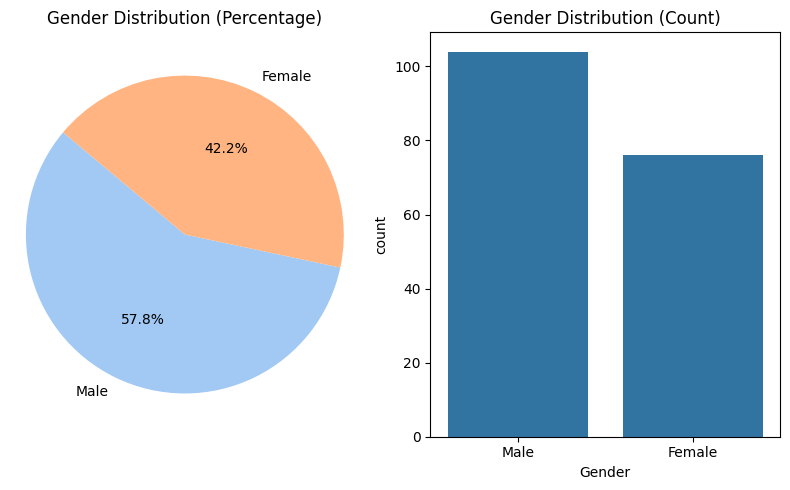

In [ ]:
 # Create subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
# Pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()
10
ax[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
ax[0].set_title('Gender Distribution (Percentage)')
ax[0].axis('equal')
# Equal aspect ratio ensures that pie is drawn as a circle.
# Countplot for Gender distribution
sns.countplot(data=df, x='Gender', ax=ax[1])
ax[1].set_title('Gender Distribution (Count)')
# Show the plot
plt.tight_layout()
plt.show()

Distribution of Self-Rated Fitness Levels

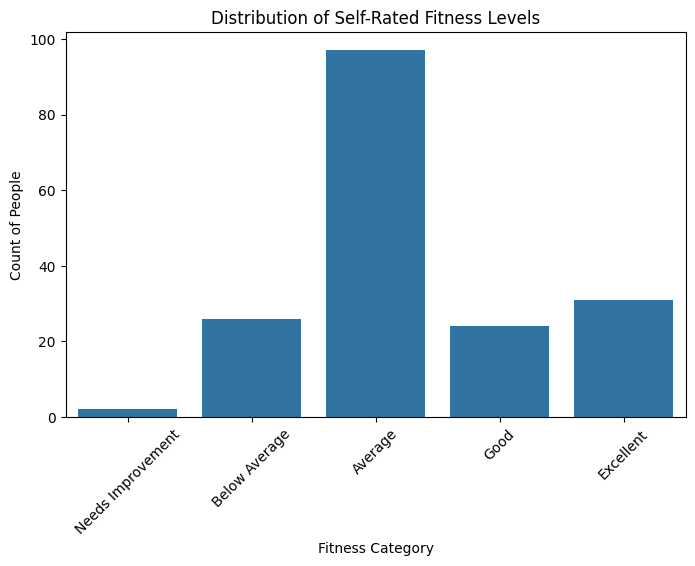

In [ ]:
# Create a countplot for the Fitness categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Fitness_Category', order=['Needs Improvement', 'Below Average', 'Average', 'Good', 'Excellent'])
plt.title('Distribution of Self-Rated Fitness Levels')
plt.xlabel('Fitness Category')
plt.ylabel('Count of People')
plt.xticks(rotation=45)
# Rotate labels for better readability
# Show the plot
plt.show()

**Income Distribution with KDE Overlay**

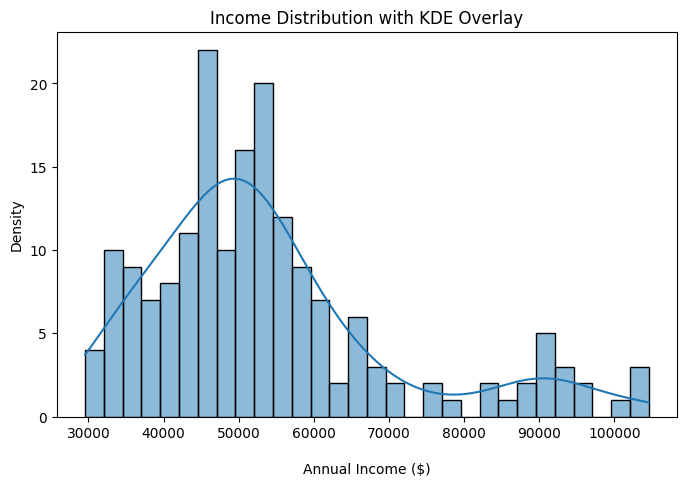

In [ ]:
# Create a histogram with a KDE overlay for the Income data
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution with KDE Overlay')
plt.xlabel('\nAnnual Income ($)')
plt.ylabel('Density')
# Show the plot
plt.show()

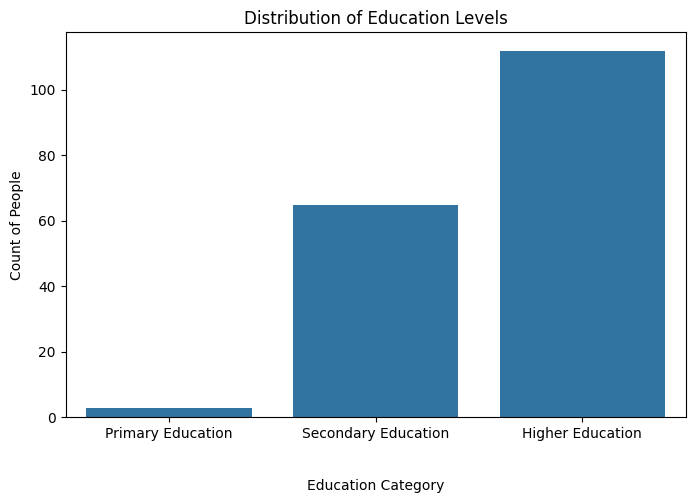

In [ ]:
 # Create a countplot for the Education groups
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Ed_Category', order=['Primary Education', 'Secondary Education', 'Higher Education'])
plt.title('Distribution of Education Levels')
plt.xlabel('\n\nEducation Category')
plt.ylabel('Count of People')
# Show the plot
plt.show()

Boxplot: Age

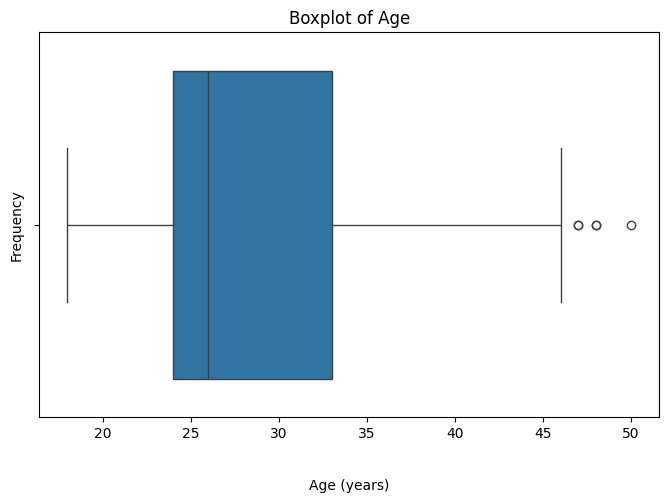

In [ ]:
# Create a boxplot for Age
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Age')
plt.title('Boxplot of Age')
plt.xlabel('\n\nAge (years)')
plt.ylabel('Frequency')
# Show the plot
plt.show()

Boxplot: Income

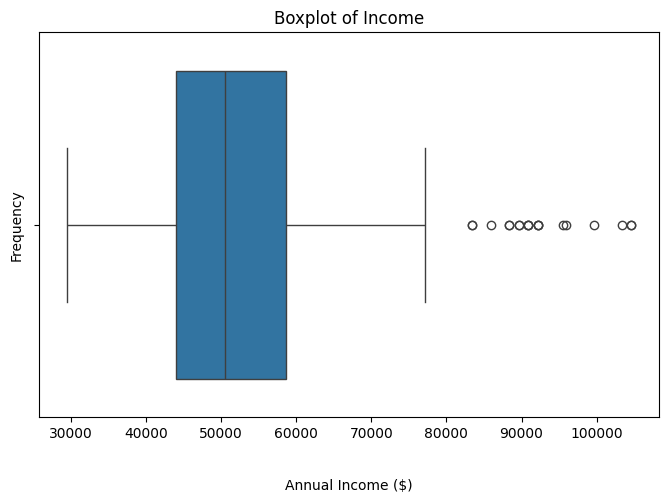

In [ ]:
# Create a boxplot for Income
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Income')
plt.title('Boxplot of Income')
plt.xlabel('\n\nAnnual Income ($)')
plt.ylabel('Frequency')
# Show the plot
plt.show()

Boxplot: Fitness


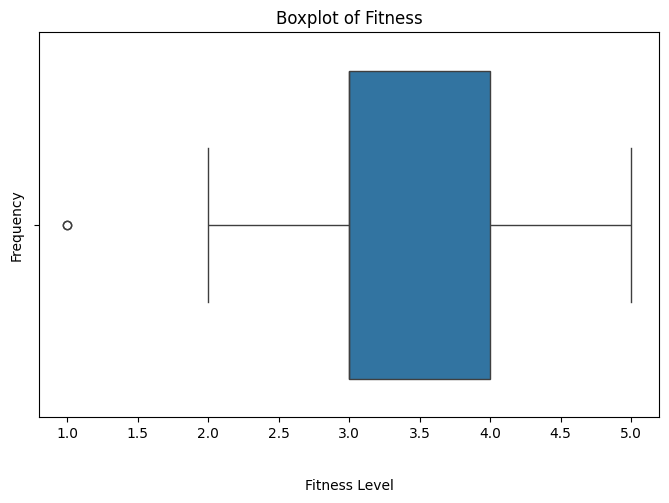

In [ ]:
# Create a boxplot for Fitness (assuming Fitness is numerically categorized)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Fitness')
plt.title('Boxplot of Fitness')
plt.xlabel('\n\nFitness Level')
plt.ylabel('Frequency')
# Show the plot
plt.show()

For correlation: Heatmaps, Pairplots

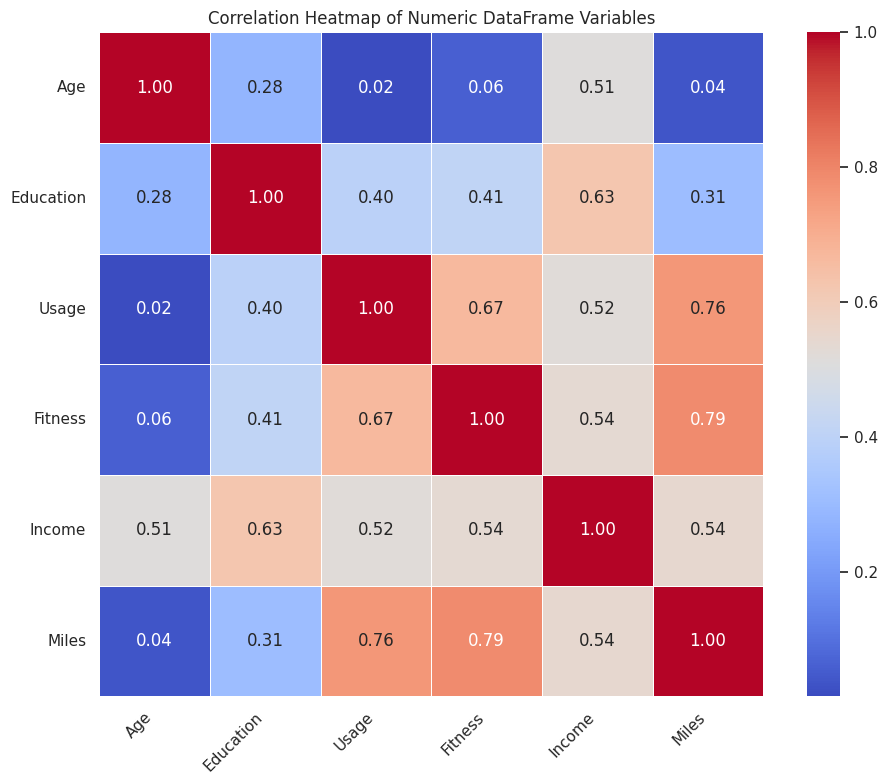

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="white")
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8)) # Adjust size to fit the matrix size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right') # Rotate x labels for better readability
plt.yticks(rotation=0) # Keep y labels horizontal for clarity
plt.title('Correlation Heatmap of Numeric DataFrame Variables')
# Add a title to the heatmap
plt.tight_layout() # Adjust layout to fit everything neatly
plt.show()

**Bivariate Analysis**

In [ ]:
# Set up the display format for floating point numbers for better readability
pd.options.display.float_format = '{:,.2f}'.format
# Compute the average usage of each product type by the customer
average_usage_by_product = df.groupby('Product')['Usage'].mean()
# Print the results
print("Average Usage Per Week by Product Type:")
print(average_usage_by_product)


Average Usage Per Week by Product Type:
Product
KP281   3.09
KP481   3.07
KP781   4.78
Name: Usage, dtype: float64


In [ ]:
# Set up the display format for floating point numbers for better readability
pd.options.display.float_format = '{:,.2f}'.format
# Compute the average age of customers for each product type
average_age_by_product = df.groupby('Product')['Age'].mean()
# Print the results
print("Average Age of Customers by Product Type:")
print(average_age_by_product)

Average Age of Customers by Product Type:
Product
KP281   28.55
KP481   28.90
KP781   29.10
Name: Age, dtype: float64


In [ ]:
# Set up the display format for floating point numbers for better readability
pd.options.display.float_format = '{:,.2f}'.format
# Compute the average education of customers for each product type
average_education_by_product = df.groupby('Product')['Education'].mean()
# Print the results
print("Average Education Level of Customers by Product Type:")
print(average_education_by_product)

Average Education Level of Customers by Product Type:
Product
KP281   15.04
KP481   15.12
KP781   17.32
Name: Education, dtype: float64


In [ ]:
# Set up the display format for floating point numbers for better readability
pd.options.display.float_format = '{:,.2f}'.format
# Compute the average fitness rating of customers for each product type
average_fitness_by_product = df.groupby('Product')['Fitness'].mean()
# Print the results
print("Average Fitness Rating of Customers by Product Type:")
print(average_fitness_by_product)

Average Fitness Rating of Customers by Product Type:
Product
KP281   2.96
KP481   2.90
KP781   4.62
Name: Fitness, dtype: float64


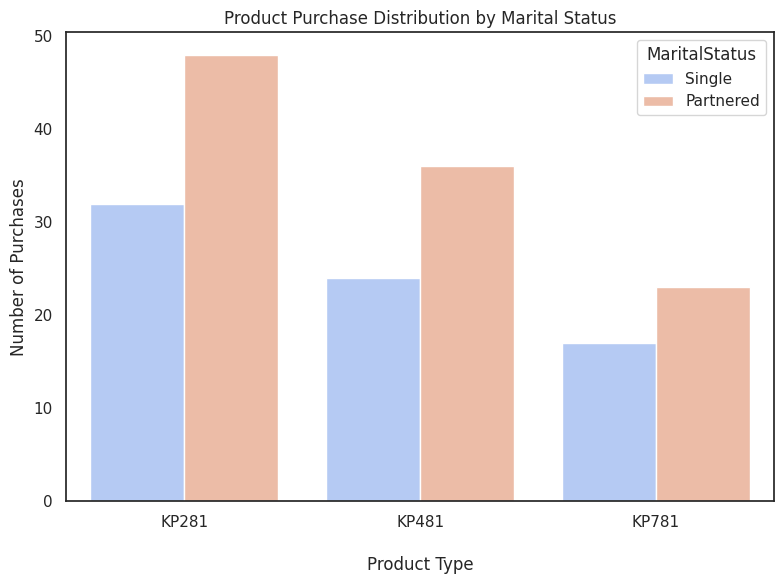

In [ ]:
 # Create a countplot showing the distribution of products purchased, categorized by marital status

plt.figure(figsize=(8, 6)) # Adjust the figure size for better visibility
sns.countplot(data=df, x='Product', hue='MaritalStatus', palette='coolwarm')
# Adding labels and title for better readability and understanding
plt.title('Product Purchase Distribution by Marital Status')
plt.xlabel('\nProduct Type')
plt.ylabel('Number of Purchases')
# Enhance layout and display the plot
plt.tight_layout()
plt.show()

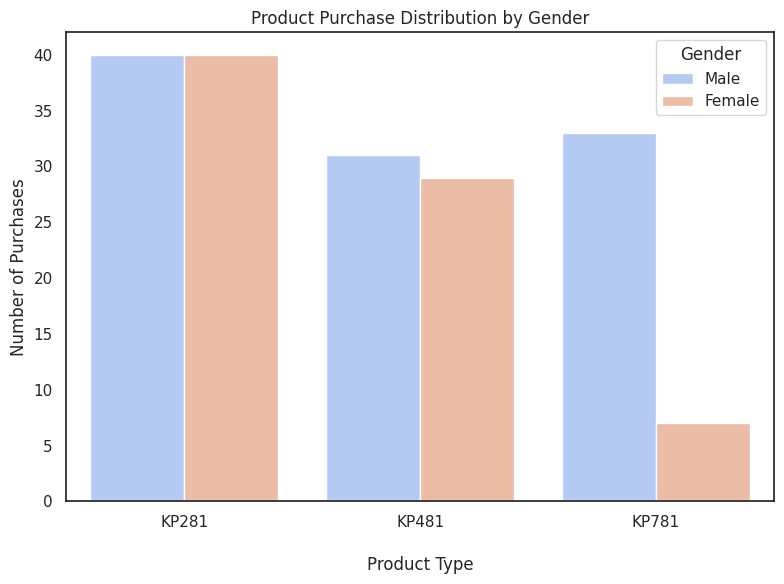

In [ ]:
# Create a countplot showing the distribution of products purchased, categorized by gender
plt.figure(figsize=(8, 6))
# Adjust the figure size for better visibility
sns.countplot(data=df, x='Product', hue='Gender', palette='coolwarm')
# Adding labels and title for better readability and understanding
plt.title('Product Purchase Distribution by Gender')
plt.xlabel('\nProduct Type')
plt.ylabel('Number of Purchases')

# Enhance layout and display the plot
plt.tight_layout()
plt.show()


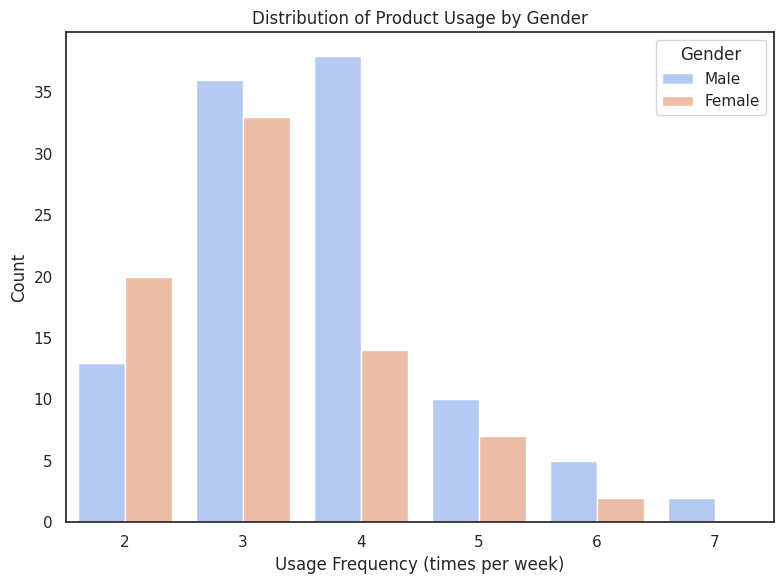

In [ ]:
 # Create a countplot showing the distribution of product usage, categorized by gender
plt.figure(figsize=(8, 6)) # Adjust the figure size for better visibility and layout
sns.countplot(data=df, x='Usage', hue='Gender', palette='coolwarm')
# Adding labels and title for better readability and understanding
plt.title('Distribution of Product Usage by Gender')
plt.xlabel('Usage Frequency (times per week)')
plt.ylabel('Count')
# Enhance layout and display the plot
plt.tight_layout()
plt.show()

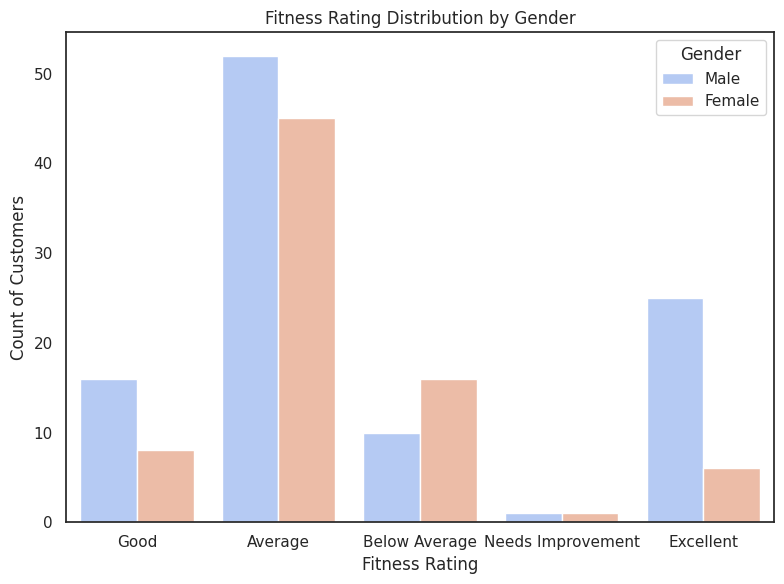

In [ ]:
# Create a countplot to show the distribution of fitness ratings, categorized by gender
plt.figure(figsize=(8, 6)) # Set the figure size for clear visibility and adequate space
sns.countplot(data=df, x='Fitness_Category', hue='Gender', palette='coolwarm')
# Adding labels and title for enhanced readability and comprehension
plt.title('Fitness Rating Distribution by Gender')
plt.xlabel('Fitness Rating')
plt.ylabel('Count of Customers')
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

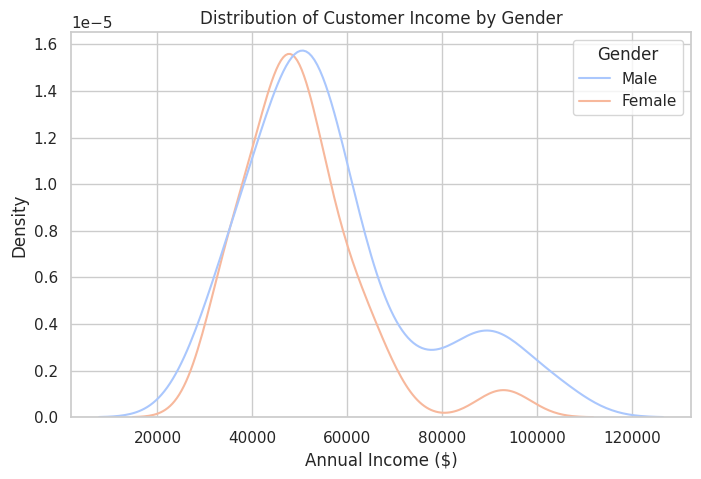

In [ ]:
# Set up the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a figure with specified size to improve clarity
plt.figure(figsize=(8, 5))
# Generate a KDE plot for the distribution of customer income, segmented by gender
# 'hue' categorizes data by gender, allowing us to compare distributions
sns.kdeplot(data=df, x='Income', hue='Gender', palette='coolwarm')
# Adding labels and title for better readability and understanding
plt.title('Distribution of Customer Income by Gender')
plt.xlabel('Annual Income ($)')
plt.ylabel('Density')
# Show the plot
plt.show()

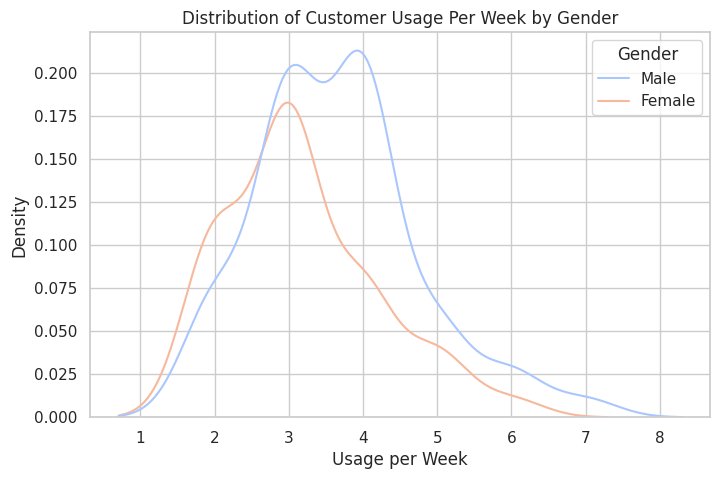

In [ ]:
# Set up the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a figure with specified size to improve clarity
plt.figure(figsize=(8, 5))
# Generate a KDE plot for the distribution of customer usage per week, segmented by gender
# 'hue' categorizes data by gender, allowing us to compare distributions
sns.kdeplot(data=df, x='Usage', hue='Gender', palette='coolwarm')
# Adding labels and title for better readability and understanding
plt.title('Distribution of Customer Usage Per Week by Gender')
plt.xlabel('Usage per Week')
plt.ylabel('Density')
# Show the plot
plt.show()

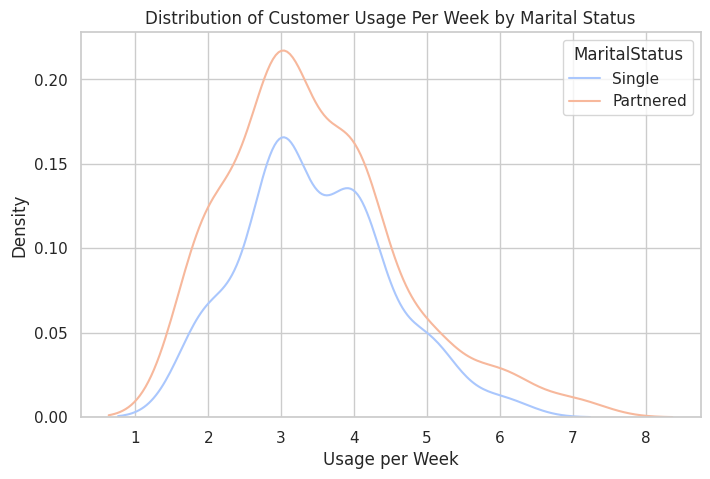

In [ ]:
#Set up the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a figure with specified size to ensure clarity and proper layout
plt.figure(figsize=(8, 5))
# Generate a KDE plot for the distribution of customer usage per week, segmented by marital status
# 'hue' categorizes data by Marital Status, allowing us to compare distributions between single and partnered customers
sns.kdeplot(data=df, x='Usage', hue='MaritalStatus', palette='coolwarm')
# Adding labels and title for better readability and understanding
plt.title('Distribution of Customer Usage Per Week by Marital Status')
plt.xlabel('Usage per Week')
plt.ylabel('Density')
# Show the plot
plt.show()

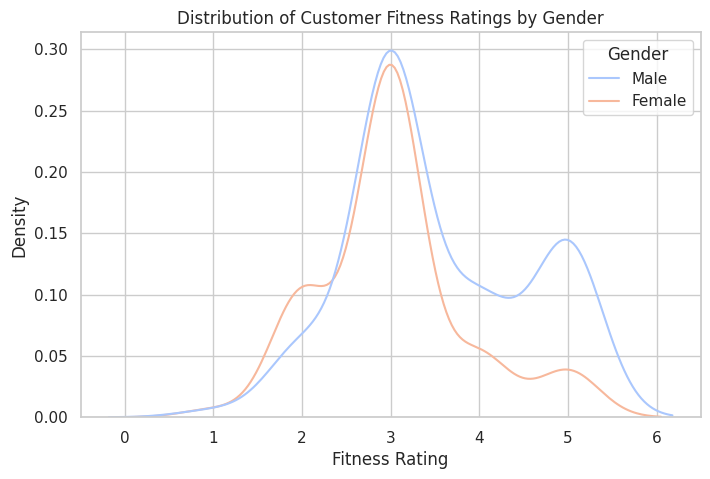

In [ ]:
# Set up the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a figure with specified size to ensure the plot is not too cramped or overly stretched
plt.figure(figsize=(8, 5))
# Generate a KDE plot for the distribution of customer fitness ratings, segmented by gender
# The 'hue' parameter categorizes data by Gender, allowing us to visually compare male and female distributions
sns.kdeplot(data=df, x='Fitness', hue='Gender', palette='coolwarm')
# Adding labels and title for better readability and understanding
plt.title('Distribution of Customer Fitness Ratings by Gender')
plt.xlabel('Fitness Rating')
plt.ylabel('Density')
# Show the plot
plt.show()

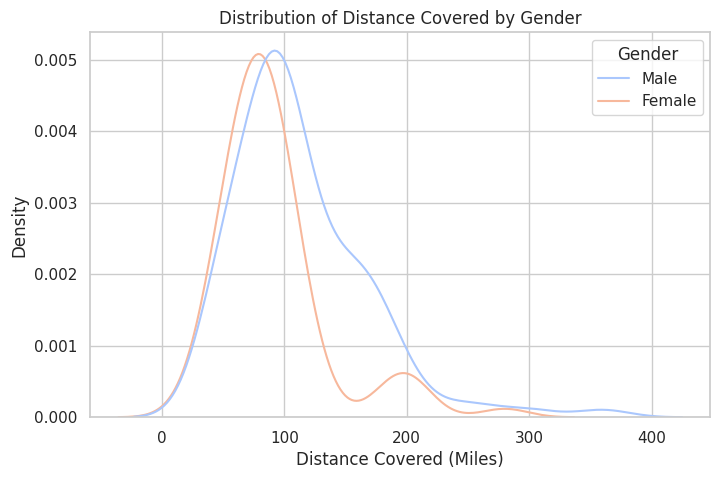

In [ ]:
# Set up the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a figure with specified size to ensure the plot is not too cramped or overly stretched
plt.figure(figsize=(8, 5))
# Generate a KDE plot for the distribution of the distance (miles) covered, segmented by gender
# The 'hue' parameter categorizes data by Gender, allowing us to visually compare male and female distributions
sns.kdeplot(data=df, x='Miles', hue='Gender', palette='coolwarm')
# Adding labels and title for better readability and understanding
plt.title('Distribution of Distance Covered by Gender')
plt.xlabel('Distance Covered (Miles)')
plt.ylabel('Density')
# Show the plot
plt.show()

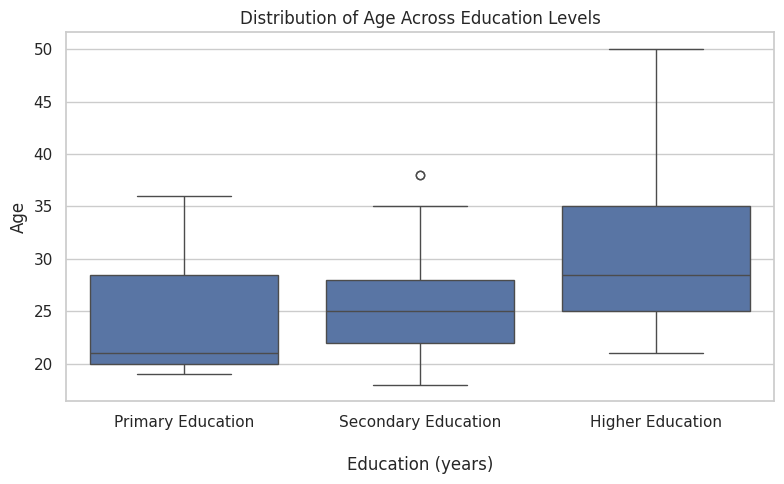

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a boxplot to show the distribution of age across different levels of education
plt.figure(figsize=(8, 5)) # Set the figure size for clear visibility and adequate layout
sns.boxplot(x='Ed_Category', y='Age', data=df)
# Adding labels and title for better readability and understanding
plt.title('Distribution of Age Across Education Levels')
plt.xlabel('\nEducation (years)')
plt.ylabel('Age')
# Enhance layout and display the plot
plt.tight_layout()
plt.show()

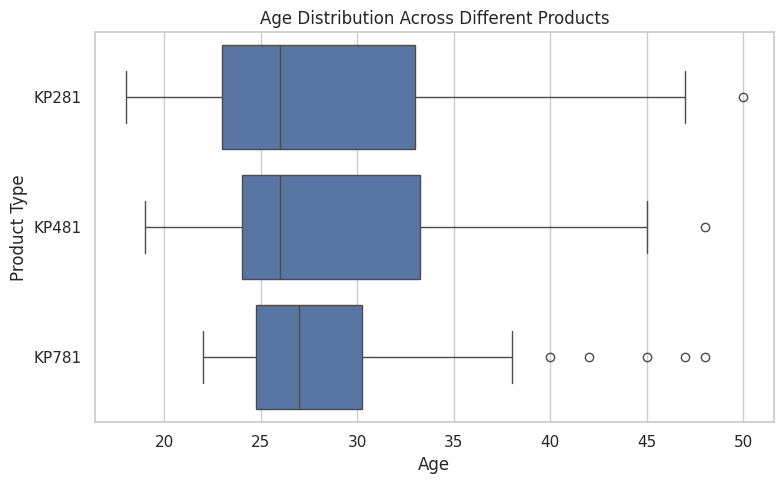

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a boxplot to show the distribution of age for each product type
plt.figure(figsize=(8, 5)) # Set the figure size for clear visibility and proper layout
sns.boxplot(x='Age', y='Product', data=df)
# Adding labels and title for better readability and understanding
plt.title('Age Distribution Across Different Products')
plt.xlabel('Age')
plt.ylabel('Product Type')
# Enhance layout and display the plot
plt.tight_layout()
plt.show()

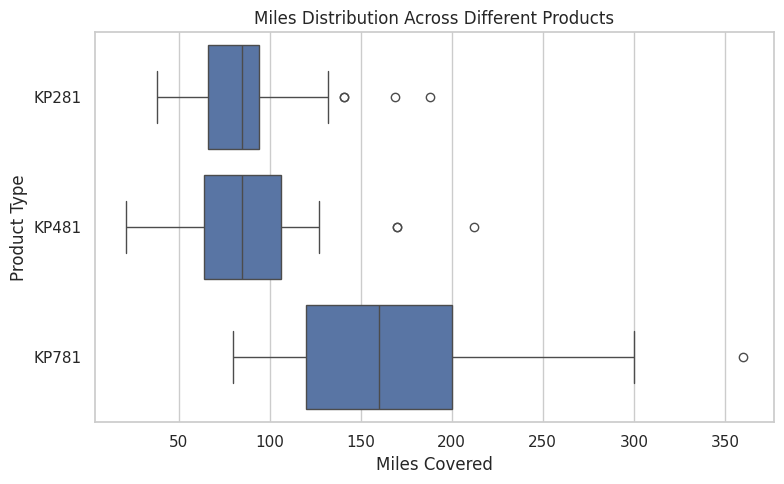

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a boxplot to show the distribution of miles covered for each product type
plt.figure(figsize=(8, 5)) # Set the figure size for clear visibility and adequate layout
sns.boxplot(x='Miles', y='Product', data=df)
# Adding labels and title for better readability and understanding
plt.title('Miles Distribution Across Different Products')
plt.xlabel('Miles Covered')
plt.ylabel('Product Type')
# Enhance layout and display the plot
plt.tight_layout()
plt.show()

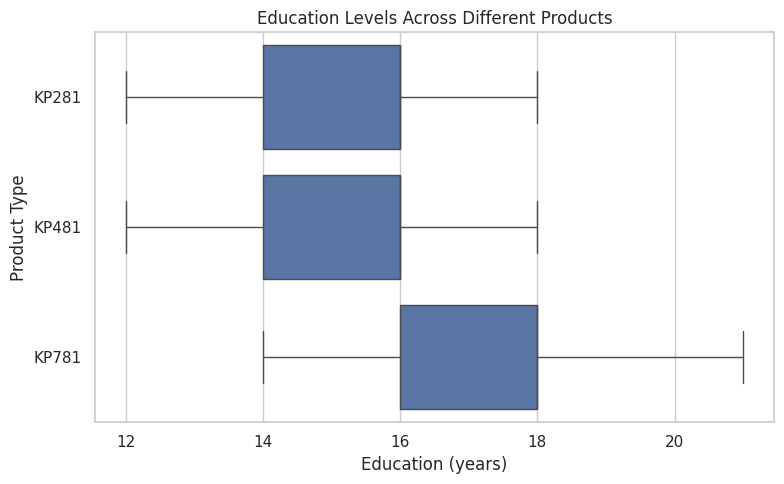

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a boxplot to show the distribution of education levels for each product type
plt.figure(figsize=(8, 5)) # Set the figure size for clear visibility and proper layout
sns.boxplot(x='Education', y='Product', data=df)
# Adding labels and title for better readability and understanding
plt.title('Education Levels Across Different Products')
plt.xlabel('Education (years)')
plt.ylabel('Product Type')
# Enhance layout and display the plot
plt.tight_layout()
plt.show()

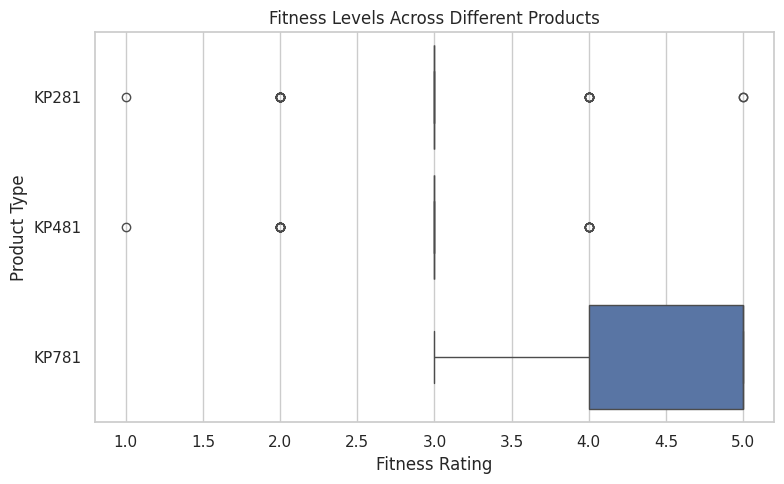

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a boxplot to show the distribution of fitness levels for each product type
plt.figure(figsize=(8, 5)) # Set the figure size for clear visibility and proper layout
sns.boxplot(x='Fitness', y='Product', data=df)
# Adding labels and title for better readability and understanding
plt.title('Fitness Levels Across Different Products')
plt.xlabel('Fitness Rating')
plt.ylabel('Product Type')
# Enhance layout and display the plot
plt.tight_layout()
plt.show()

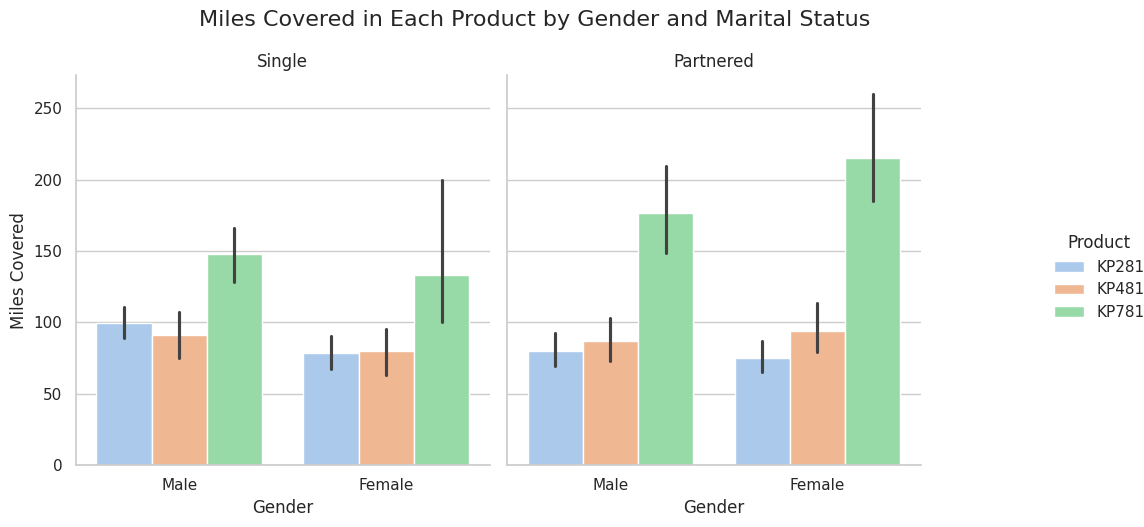

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a categorical plot with bars showing the distribution of miles covered for each product,
# categorized by gender and further segmented by marital status
g = sns.catplot(x='Gender', y='Miles', hue='Product', col='MaritalStatus', data=df, kind='bar', palette='pastel', height=5, aspect=1)
# Adding labels and titles for better readability and understanding
g.set_titles("{col_name}") # Dynamic title based on column name
g.set_axis_labels("Gender", "Miles Covered")
g.fig.suptitle('Miles Covered in Each Product by Gender and Marital Status', fontsize=16, y=1.05) # Adjust y for better fit
# Adjust the legend position outside the plot to the right of the whole figure
g._legend.set_bbox_to_anchor((1.05, 0.5)) # Adjust these values to move the legend
# Adjust layout
plt.subplots_adjust(right=0.85) # Adjust this value based on your specific layout needs to avoid cutting off subplots
# Show the plot
plt.show()


Computing Probability - Marginal, Conditional Probability

**Probability of product purchase w.r.t. gender**

In [ ]:
 pd.crosstab(index = df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


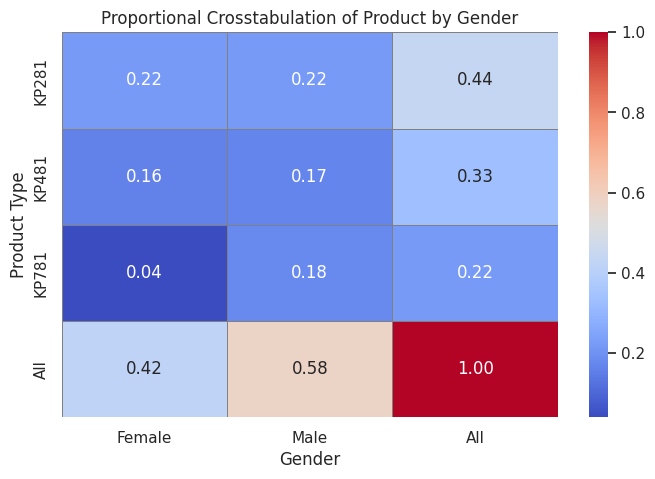

In [ ]:
# Create a crosstabulation of Product and Gender
crosstab = pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True, normalize=True).round(2)
# Create a heatmap with lighter colors and annotations enabled
plt.figure(figsize=(8, 5)) # Adjust the figure size as needed
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='grey')
# Adding labels and title
plt.title('Proportional Crosstabulation of Product by Gender')
plt.xlabel('Gender')
plt.ylabel('Product Type')
# Show the plot
plt.show()

**Insights** - The Probability of a treadmill being purchased by a female is 42%.
- The conditional probability of purchasing the treadmill model given that the customer is
female is
  
  - For Treadmill model KP281 - 22%
  - For Treadmill model KP481 - 16%
  - For Treadmill model KP781 - 4%
- The Probability of a treadmill being purchased by a male is 58%.
- The conditional probability of purchasing the treadmill model given that the customer is male
is
  - For Treadmill model KP281 - 22%
  - For Treadmill model KP481 - 17%
  - For Treadmill model KP781 - 18%



---



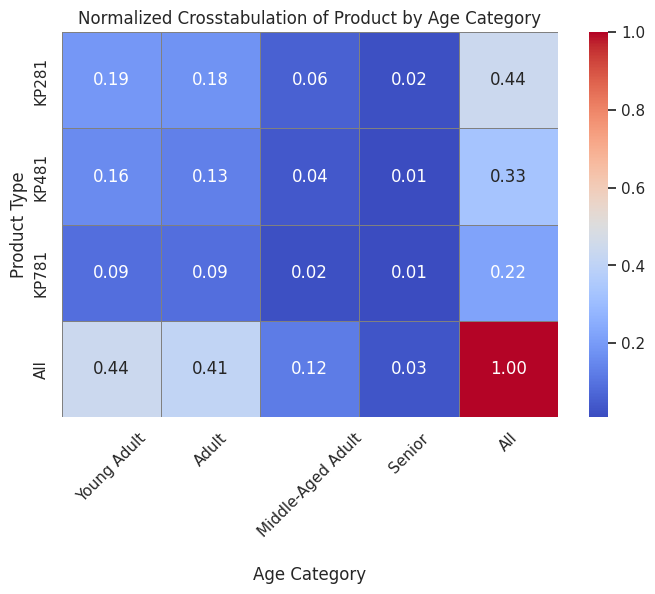

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a crosstabulation of Product and Age_Category
crosstab = pd.crosstab(index=df['Product'], columns=df['Age_Category'], margins=True, normalize=True).round(2)
# Create a heatmap to visualize the crosstab
plt.figure(figsize=(8, 5)) # Adjust the figure size as needed
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='grey')
# Adding labels and title
plt.title('Normalized Crosstabulation of Product by Age Category')
plt.xlabel('\nAge Category')
plt.ylabel('Product Type')
plt.xticks(rotation=45)
# Show the plot
plt.show()

**Insights**

-  The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.
-  The conditional probability of purchasing the treadmill model given that the customer is
 Young Adult is

 - For Treadmill model KP281 - 19%
 - For Treadmill model KP481 - 16%
 - For Treadmill model KP781 - 9%

- The Probability of a treadmill being purchased by a Adult(26-35) is 41%.
- The conditional probability of purchasing the treadmill model given that the customer is Adult is

 - For Treadmill model KP281 - 18%
 - For Treadmill model KP481 - 13%
 - For Treadmill model KP781 - 9%
- The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.
- The Probability of a treadmill being purchased by a Senior(Above 45) is only 3%.

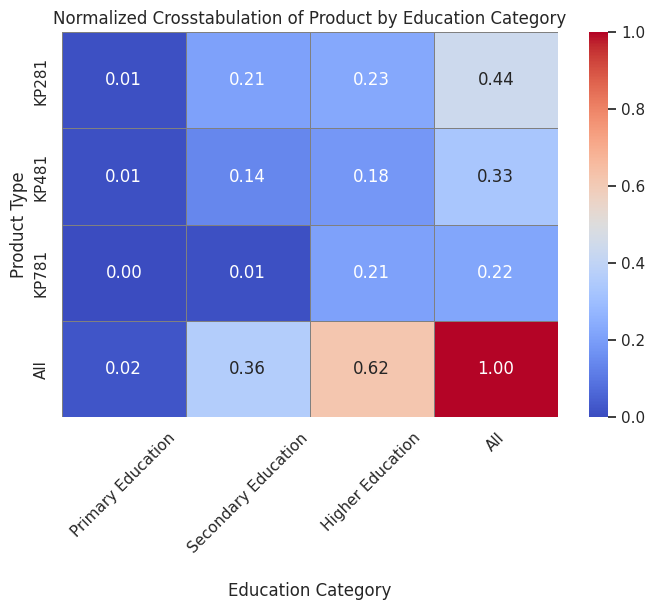

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a crosstabulation of Product and Education Category
crosstab = pd.crosstab(index=df['Product'], columns=df['Ed_Category'], margins=True, normalize=True).round(2)
# Create a heatmap to visualize the crosstab
plt.figure(figsize=(8, 5)) # Adjust the figure size as needed
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='grey')
# Adding labels and title
plt.title('Normalized Crosstabulation of Product by Education Category')
plt.xlabel('\nEducation Category')
plt.ylabel('Product Type')
plt.xticks(rotation=45)
# Show the plot
plt.show()

**Insights**
- The Probability of a treadmill being purchased by a customer with Higher Education(Above
15 Years) is 62%.
- The conditional probability of purchasing the treadmill model given that the customer has
Higher Education is
  - For Treadmill model KP281 - 23%
  - For Treadmill model KP481 - 18%
  - For Treadmill model KP781 - 21%

- The Probability of a treadmill being purchased by a customer with Secondary Education(13- 15 yrs) is 36%.
- The conditional probability of purchasing the treadmill model given that the customer has
Secondary Education i:
  - For Treadmill model KP281 - 21%
  - For Treadmill model KP481 - 14%
  - For Treadmill model KP781 - 1%
-  The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2%




**Probability of product purchase w.r.t. Income**

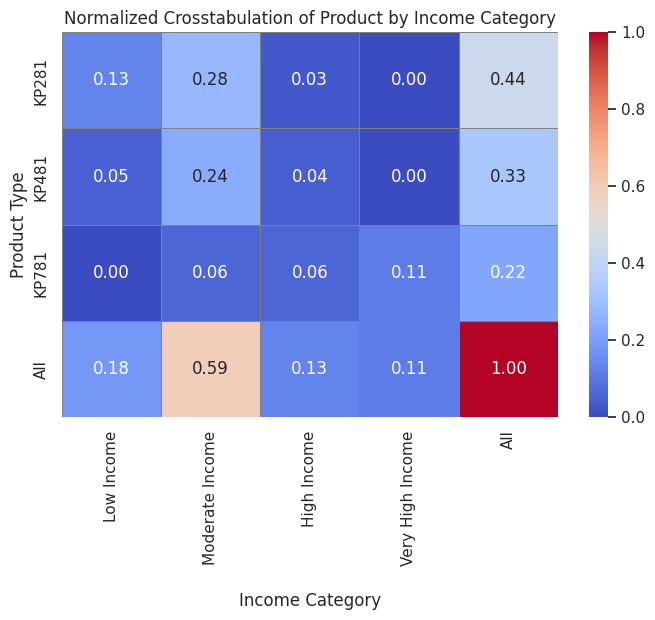

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a crosstabulation of Product and Income Category
crosstab = pd.crosstab(index=df['Product'], columns=df['Income_Category'], margins=True, normalize=True).round(2)
# Create a heatmap to visualize the crosstab
plt.figure(figsize=(8, 5)) # Adjust the figure size as needed for better visualization
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='grey')
# Adding labels and title
plt.title('Normalized Crosstabulation of Product by Income Category')
plt.xlabel('\nIncome Category')
plt.ylabel('Product Type')
# Show the plot
plt.show()

**Insights**
-  The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.
-  The conditional probability of purchasing the treadmill model given that the customer has
Low Income is
  - For Treadmill model KP281 - 13%
  - For Treadmill model KP481 - 5%
  - For Treadmill model KP781 - 0%
- The Probability of a treadmill being purchased by a customer with Moderate Income(40k -
60k) is 59%.
- The conditional probability of purchasing the treadmill model given that the customer has
Moderate Income is
  - For Treadmill model KP281 - 28%
  - For Treadmill model KP481 - 24%
  - For Treadmill model KP781 - 6%
- The Probability of a treadmill being purchased by a customer with High Income(60k - 80k)
is 13%
- The conditional probability of purchasing the treadmill model given that the customer has
High Income is -
  - For Treadmill model KP281 - 3%
  - For Treadmill model KP481 - 4%
  - For Treadmill model KP781 - 6%
- The Probability of a treadmill being purchased by a customer with Very High Income(>80k)
is 11%
- The conditional probability of purchasing the treadmill model given that the customer has
High Income is -
  - For Treadmill model KP281 - 0%
  - For Treadmill model KP481 - 0%
  -For Treadmill model KP781 - 11%



**Probability of product purchase w.r.t. Marital Status**

---



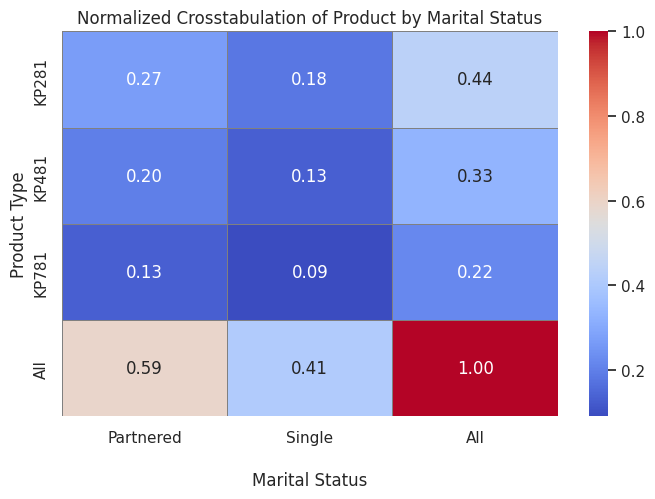

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a crosstabulation of Product and Marital Status
crosstab = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True, normalize=True).round(2)
# Create a heatmap to visualize the crosstab
plt.figure(figsize=(8, 5)) # Adjust the figure size as needed for better visibility
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='grey')

# Adding labels and title
plt.title('Normalized Crosstabulation of Product by Marital Status')
plt.xlabel('\nMarital Status')
plt.ylabel('Product Type')
# Show the plot
plt.show()


**Insights**
- The Probability of a treadmill being purchased by a Married Customer is 59%.
- The conditional probability of purchasing the treadmill model given that the customer is
Married is
  - For Treadmill model KP281 - 27%
  - For Treadmill model KP481 - 20%
  - For Treadmill model KP781 - 13%
- The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

- The conditional probability of purchasing the treadmill model given that the customer is
Unmarried is -
  - For Treadmill model KP281 - 18%
  - For Treadmill model KP481 - 13%
  - For Treadmill model KP781 - 9%

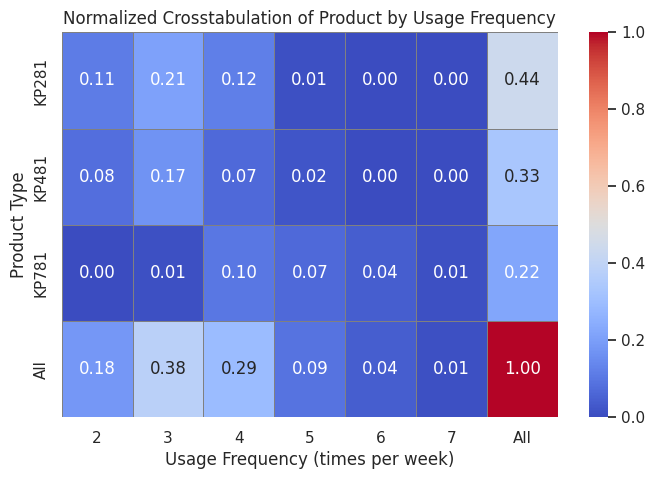

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a crosstabulation of Product and Usage
crosstab = pd.crosstab(index=df['Product'], columns=df['Usage'], margins=True, normalize=True).round(2)
# Create a heatmap to visualize the crosstab
plt.figure(figsize=(8, 5)) # Adjust the figure size as needed for better visibility
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='grey')
# Adding labels and title
plt.title('Normalized Crosstabulation of Product by Usage Frequency')
plt.xlabel('Usage Frequency (times per week)')
plt.ylabel('Product Type')
# Show the plot
plt.show()

**Insights**
- The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

- The conditional probability of purchasing the treadmill model given that the customer has

Usage 3 per week is -
   - For Treadmill model KP281 - 21%
   - For Treadmill model KP481 - 17%
   - For Treadmill model KP781 - 1%

The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

The conditional probability of purchasing the treadmill model given that the customer has
Usage 4 per week is
  - For Treadmill model KP281 - 12%
  - For Treadmill model KP481 - 7%
  - For Treadmill model KP781 - 10%

The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

The conditional probability of purchasing the treadmill model given that the customer has
Usage 2 per week is
 - For Treadmill model KP281 - 11%
 - For Treadmill model KP481 - 8%
 - For Treadmill model KP781 - 0%

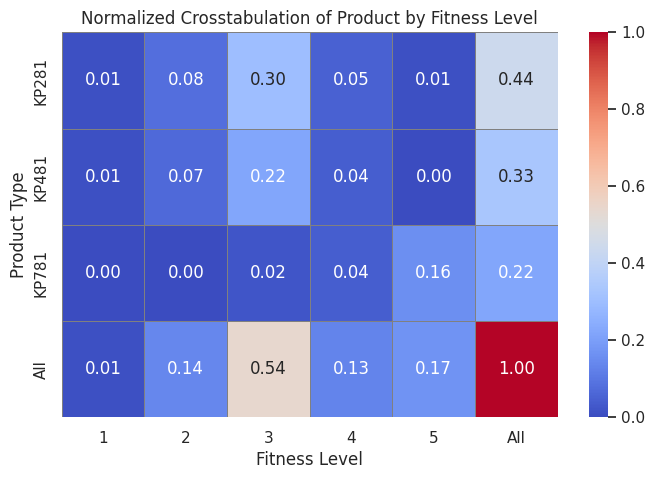

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a crosstabulation of Product and Fitness
crosstab = pd.crosstab(index=df['Product'], columns=df['Fitness'], margins=True, normalize=True).round(2)
# Create a heatmap to visualize the crosstab
plt.figure(figsize=(8, 5)) # Adjust the figure size as needed for better visibility
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='grey')
# Adding labels and title
plt.title('Normalized Crosstabulation of Product by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Product Type')
# Show the plot
plt.show()

- The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.
- The conditional probability of purchasing the treadmill model given that the customer has
Average Fitness is
  - For Treadmill model KP281 - 30%
 - For Treadmill model KP481 - 22%
  - For Treadmill model KP781 - 2%
- The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost
15%.
- The Probability of a treadmill being purchased by a customer with very low(1) Fitness is
only 1%

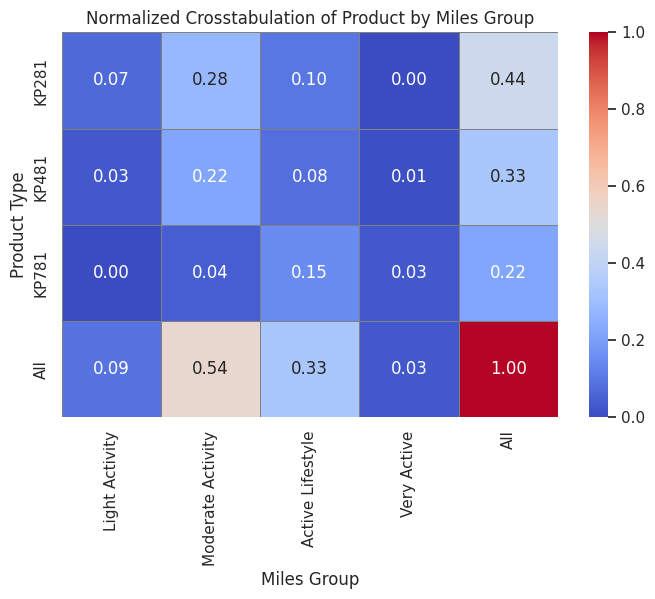

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a crosstabulation of Product and Miles Group
crosstab = pd.crosstab(index=df['Product'], columns=df['Miles_Category'], margins=True, normalize=True).round(2)
# Create a heatmap to visualize the crosstab
plt.figure(figsize=(8, 5)) # Adjust the figure size as needed for better visibility
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='grey')
# Adding labels and title
plt.title('Normalized Crosstabulation of Product by Miles Group')
plt.xlabel('Miles Group')
plt.ylabel('Product Type')
# Show the plot
plt.show()

# Insights
The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.
- The conditional probability of purchasing the treadmill model given that the customer has
Light Activity Lifestyle is
  - For Treadmill model KP281 - 7%
  - For Treadmill model KP481 - 3%
  - For Treadmill model KP781 - 0%
- The Probability of a treadmill being purchased by a customer with lifestyle of Moderate
Activity(51 to 100 miles/week) is 54%.
• The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is

  - For Treadmill model KP281 - 28%
  - For Treadmill model KP481 - 22%
  - For Treadmill model KP781 - 4%

- The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200
miles/week) is 33%.
- The conditional probability of purchasing the treadmill model given that the customer has
Active Lifestyle is
  - For Treadmill model KP281 - 10%
  - For Treadmill model KP481 - 8%
  - For Treadmill model KP781 - 15%

- The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200
miles/week) is 3% only

# Customer Profiling

Product Purchase Probabilities:
 - KP281 Treadmill: 44% probability of purchase.
 - KP481 Treadmill: 33% probability of purchase.
 - KP781 Treadmill: 22% probability of purchase.

**#Customer Profile for KP281 Treadmill:**

**Demographics and Usage:**
Predominantly younger customers aged 18 to 35 years, with some
between 35 to 50 years. Popular among both single females and partnered males, with a slightly higher preference among females. Typical customers have at least 13 years of education.

**Financials and Fitness**: - Annual income generally below USD 60,000. Weekly usage averages 3 to 4 times, primarily for moderate fitness goals. - Fitness ratings typically range from 2 to 4, with mileage between 50 to 100 miles per week.
**Narrative Insight** : This entry-level treadmill is favored for its affordability and reliability,
making it a popular choice among beginners and budget-conscious buyers.

**Customer Profile for KP481 Treadmill:**

**Demographics and Usage**: - Common among customers aged 18 to 35, extending up to middle-aged groups. - Favored more by females, reflecting a significant gender preference. - Education
levels similar to KP281, with some users having advanced education.

**Financials and Fitness:** - Income ranges from USD 40,000 to USD 80,000. - Usage patterns show a preference for achieving higher mileage (70 to 130 miles per week). - Fitness levels vary,
but generally align with active lifestyles.

**Narrative Insight**: - This intermediate product attracts those looking to enhance their fitness
regime. It’s particularly noted for its suitability for female users who are intermediate exercisers.

**#Customer Profile for KP781 Treadmill:**
**Demographics and Usage:** - Mainly popular with males aged 18 to 35 who engage in high-
intensity workouts. - Preferred by singles more than partnered customers, indicating a trend among
those who may prioritize personal fitness.
**Financials and Fitness:** - Higher income bracket (over USD 75,000), reflecting its advanced
features and pricing. - Frequent usage of 4 to 7 times per week, with customers often reaching 120
to 200+ miles. - Highest fitness ratings (3 to 5), indicating its appeal to the most dedicated fitness
enthusiasts.
**Narrative Insight** - As the premium offering, KP781 is less commonly purchased but highly
valued by serious athletes and fitness enthusiasts looking for advanced capabilities and performance.

#Recommendations
**Targeted Marketing for Female Customers:**
 - Launch a focused marketing campaign to
encourage more women to exercise, addressing the current low engagement among female customers.

- Consider special promotions and trial periods specifically designed for women to increase the sales of the KP781 model, where female participation is notably low.

**Promotion of Budget-Friendly Treadmills**:
- Market the KP281 and KP481 models as budget-friendly options, emphasizing their affordability for customers with annual incomes in the range of
$39K - $53K.
- Implement flexible payment plans that allow these customers to spread costs overtime, making treadmills more accessible.
**Strategic Positioning of KP781:**
- Position the KP781 treadmill as a premium option for
professional athletes and fitness enthusiasts by highlighting its advanced features and functionalities.
- Collaborate with influencers and international athletes to promote KP781, leveraging their credibility and reach to enhance product visibility and appeal.
**Expansion and Inclusivity in Marketing:**
- Conduct research to explore potential markets beyond the 50-year age demographic, considering health benefits and possible risks to offer suitable
products.
- Target the age group above 40 years with tailored marketing campaigns for the KP781, catering to their specific fitness needs and capacities.

**Upgrade Incentives**:
- Provide incentives for customers to upgrade from lower models (KP281
or KP481) to the KP781 after consistent usage, which could include trade-in credits or discounts
on upgrades.

**Development of User-Friendly Technology**:
- Develop a user-friendly app that integrates seamlessly with the treadmills, offering features like tracking weekly mileage, providing real-time feedback, and personalized workout recommendations based on user’s fitness levels and goals.
- Ensure the app enhances user engagement and enriches the overall fitness experience.

**Gender-Specific Campaigns**:
- Address the sales disparity in KP784 model sales between genders by launching campaigns that are specifically tailored to attract and engage female customers.